In [1]:
import fastai
from fastai.vision.all import *
from pathlib import Path
import os
import cv2
from sklearn.model_selection import GroupKFold, StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

C:\Users\user\miniconda3\envs\fastai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("final_train_df.csv")

In [3]:
N_FOLDS = 8
gkf = GroupKFold(n_splits = N_FOLDS)
train_df = df[df.n_segs > 0].reset_index(drop = True)

print (f"Dropped all the cases with zero segmentation. Size of the dataframe {len(train_df)}")

train_df["which_segs"] = train_df["large_bowel_seg_flag"].astype(int).astype(str) + train_df["small_bowel_seg_flag"].astype(int).astype(str) + train_df["stomach_seg_flag"].astype(int).astype(str)

for train_idxs, val_idxs in gkf.split(train_df["id"], train_df["which_segs"], train_df["case_no_int"]):
    sub_train_df = train_df.iloc[train_idxs]
    N_TRAIN = len(sub_train_df)
    sub_train_df = sub_train_df.sample(N_TRAIN).reset_index(drop = True)
    
    sub_val_df = train_df.iloc[val_idxs]
    N_VAL = len(sub_val_df)
    sub_val_df = sub_val_df.sample(N_VAL).reset_index(drop = True)
    
    break
    
sub_train_df.large_bowel_seg.fillna("", inplace = True)
sub_train_df.small_bowel_seg.fillna("", inplace = True)
sub_train_df.stomach_seg.fillna("", inplace = True)

sub_val_df.large_bowel_seg.fillna("", inplace = True)
sub_val_df.small_bowel_seg.fillna("", inplace = True)
sub_val_df.stomach_seg.fillna("", inplace = True)


print ("FOLD 1 TRAIN DF:")
display(sub_train_df.head())

print ("FOLD 1 VAlID DF:")
display(sub_val_df.head())

Dropped all the cases with zero segmentation. Size of the dataframe 16590
FOLD 1 TRAIN DF:


,id,class,segmentation,case_no,case_no_int,day_no,day_no_int,slice_id,f_path,slice_h,...,px_spacing_h,px_spacing_w,large_bowel_seg,small_bowel_seg,stomach_seg,large_bowel_seg_flag,small_bowel_seg_flag,stomach_seg_flag,n_segs,which_segs
0,case122_day27_slice_0069,large_bowel,15582 13 15846 17 16111 20 16376 22 16642 23 16907 27 17173 34 17438 38 17704 40 17970 41 18237 41 18503 42 18769 42 19036 42 19302 41 19569 40 19837 37 20104 36 20150 7 20371 34 20414 11 20638 33 20679 13 20905 31 20945 14 21171 31 21210 16 21438 30 21476 16 21705 28 21741 18 21978 21 22007 19 22245 19 22273 20 22511 18 22539 21 22777 17 22805 23 23044 14 23071 24 23311 12 23337 24 23578 10 23603 25 23845 8 23869 26 24113 5 24135 26 24400 28 24666 28 24932 28 25197 29 25463 28 25729 27 25995 26 26260 26 26526 26 26792 24 27058 11 27074 4 27324 10 27591 8 27858 6 28126 3 28411 3 28674 7 28...,case122,122,day27,27,slice_0069,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case122\case122_day27\scans\slice_0069_266_266_1.50_1.50.png,266,...,1.5,1.5,15582 13 15846 17 16111 20 16376 22 16642 23 16907 27 17173 34 17438 38 17704 40 17970 41 18237 41 18503 42 18769 42 19036 42 19302 41 19569 40 19837 37 20104 36 20150 7 20371 34 20414 11 20638 33 20679 13 20905 31 20945 14 21171 31 21210 16 21438 30 21476 16 21705 28 21741 18 21978 21 22007 19 22245 19 22273 20 22511 18 22539 21 22777 17 22805 23 23044 14 23071 24 23311 12 23337 24 23578 10 23603 25 23845 8 23869 26 24113 5 24135 26 24400 28 24666 28 24932 28 25197 29 25463 28 25729 27 25995 26 26260 26 26526 26 26792 24 27058 11 27074 4 27324 10 27591 8 27858 6 28126 3 28411 3 28674 7 28...,30680 9 30945 11 31210 13 31476 13 31742 13 32008 13 32274 13 32540 12 32807 8 33074 6 33341 4,19817 10 20081 16 20344 20 20609 22 20875 23 21140 25 21406 26 21671 27 21937 27 22203 27 22468 29 22733 30 22997 32 23260 35 23524 38 23787 41 24051 43 24314 47 24577 50 24842 51 25106 54 25370 56 25633 60 25897 63 26162 66 26427 68 26692 71 26957 73 27223 74 27488 76 27754 76 28020 76 28286 56 28347 15 28552 55 28616 12 28818 27 28849 24 28883 9 29084 24 29118 19 29149 6 29350 22 29386 15 29415 4 29616 19 29654 11 29681 3 29883 16 30150 12,True,True,True,3,111
1,case138_day0_slice_0123,large_bowel,NaN,case138,138,day0,0,slice_0123,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case138\case138_day0\scans\slice_0123_266_266_1.50_1.50.png,266,...,1.5,1.5,,26184 5 26433 8 26449 7 26693 15 26715 8 26746 3 26958 16 26981 8 27010 8 27223 18 27247 8 27275 11 27488 19 27513 8 27541 11 27754 18 27779 9 27807 12 28020 18 28045 11 28073 12 28287 16 28311 12 28339 12 28553 12 28577 13 28606 10 28820 5 28843 14 28873 9 28898 3 29110 14 29141 5 29163 6 29377 13 29428 7 29644 12 29693 9 29911 11 29947 11 29959 9 30179 9 30206 28 30446 8 30470 31 30712 8 30734 33 30978 8 30999 34 31244 8 31265 34 31509 9 31531 34 31775 9 31797 34 32041 9 32063 16 32082 15 32307 9 32330 10 32351 12 32573 9 32598 5 32618 10 32839 9 32887 6 33105 9 33372 7 33638 6 33853 4 3...,,False,True,False,1,010
2,case130_day20_slice_0052,large_bowel,27090 11 27355 14 27619 17 27884 19 28150 20 28415 22 28681 22 28947 23 29212 25 29478 25 29743 27 30009 27 30275 28 30541 28 30807 29 31073 29 31339 30 31605 30 31871 30 32137 30 32403 30 32670 29 32936 29 33203 28 33470 27 33737 26 34003 25 34270 24 34536 24 34802 24 35068 24 35334 24 35600 24 35867 23 36133 22 36399 21 36665 21 36932 19 37198 19 37465 18 37731 18 37997 17 38263 16 38530 15 38796 14 39063 12 39329 10 39595 9 39861 8 40128 6 40394 5,case130,130,day20,20,slice_0052,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case130\case130_day20\scans\slice_0052_266_266_1.50_1.50.png,266,...,1.5,1.5,27090 11 27355 14 27619 17 27884 19 28150 20 28415 22 28681 22 28947 23 29212 25 29478 25 29743 27 30009 27 30275 28 30541 28 30807 29 31073 29 31339 30 31605 30 31871 30 32137 30 32403 30 32670 29 32936 29 33203 28 33470 27 33737 26 34003 25 34270 24 34536 24 3

FOLD 1 VAlID DF:


,id,class,segmentation,case_no,case_no_int,day_no,day_no_int,slice_id,f_path,slice_h,...,px_spacing_h,px_spacing_w,large_bowel_seg,small_bowel_seg,stomach_seg,large_bowel_seg_flag,small_bowel_seg_flag,stomach_seg_flag,n_segs,which_segs
0,case142_day0_slice_0097,large_bowel,24334 5 24596 18 24833 14 24860 24 25098 17 25125 29 25363 59 25628 62 25887 69 26151 72 26413 76 26677 78 26941 80 27205 82 27469 84 27734 84 27999 85 28264 86 28529 86 28795 84 29060 81 29326 54 29387 17 29592 53 29656 5 29858 52 30125 49 30391 48 30657 47 30923 47 31190 45 31456 20 31478 22 31723 18 31745 21 31989 18 32012 19 32256 16 32279 17 32522 16 32546 16 32789 14 32813 14 33057 11 33080 12 33326 5 33347 10 33616 5 33983 5 34246 9 34510 13 34775 15 35040 17 35306 17 35571 19 35837 19 36103 19 36369 20 36635 20 36901 20 37167 20 37434 18 37700 18 37967 17 38234 15 38502 12 38770 8 ...,case142,142,day0,0,slice_0097,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case142\case142_day0\scans\slice_0097_266_266_1.50_1.50.png,266,...,1.5,1.5,24334 5 24596 18 24833 14 24860 24 25098 17 25125 29 25363 59 25628 62 25887 69 26151 72 26413 76 26677 78 26941 80 27205 82 27469 84 27734 84 27999 85 28264 86 28529 86 28795 84 29060 81 29326 54 29387 17 29592 53 29656 5 29858 52 30125 49 30391 48 30657 47 30923 47 31190 45 31456 20 31478 22 31723 18 31745 21 31989 18 32012 19 32256 16 32279 17 32522 16 32546 16 32789 14 32813 14 33057 11 33080 12 33326 5 33347 10 33616 5 33983 5 34246 9 34510 13 34775 15 35040 17 35306 17 35571 19 35837 19 36103 19 36369 20 36635 20 36901 20 37167 20 37434 18 37700 18 37967 17 38234 15 38502 12 38770 8 ...,25693 1 25957 5 26223 5 26488 6 26754 6 27020 6 27286 6 27551 7 27583 1 27817 8 27847 6 28083 8 28112 8 28348 9 28378 9 28615 8 28644 10 28881 8 28910 11 29148 6 29177 10 29444 10 29711 9 29977 10 30244 11 30510 13 30776 14 31042 16 31309 16 31575 18 31842 18 32108 18 32374 19 32629 2 32639 20 32894 8 32903 21 33159 31 33425 29 33691 26 33958 15 34224 12 34491 10 34759 6,,True,True,False,2,110
1,case36_day0_slice_0107,large_bowel,45960 7 46319 10 46679 12 47039 14 47398 16 47758 17 48119 16 48479 17 48839 17 49199 18 49559 18 49919 18 50280 17 50640 17 51000 17 51360 16 51720 15 52081 12 52442 9 52463 5 52804 1 52818 11 53176 14 53535 15 53894 16 54254 16 54613 17 54973 17 55333 17 55693 17 56053 17 56413 17 56773 17 57134 16 57494 16 57854 16 58214 15 58575 14 58937 11 59298 10 59659 9 60019 8 60381 4,case36,36,day0,0,slice_0107,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case36\case36_day0\scans\slice_0107_360_310_1.50_1.50.png,360,...,1.5,1.5,45960 7 46319 10 46679 12 47039 14 47398 16 47758 17 48119 16 48479 17 48839 17 49199 18 49559 18 49919 18 50280 17 50640 17 51000 17 51360 16 51720 15 52081 12 52442 9 52463 5 52804 1 52818 11 53176 14 53535 15 53894 16 54254 16 54613 17 54973 17 55333 17 55693 17 56053 17 56413 17 56773 17 57134 16 57494 16 57854 16 58214 15 58575 14 58937 11 59298 10 59659 9 60019 8 60381 4,39433 12 39791 14 40150 16 40510 16 40870 16 41230 16 41590 16 41950 17 42311 17 42672 17 42995 4 43032 18 43352 8 43392 18 43711 9 43752 18 44069 11 44112 19 44428 12 44472 19 44787 13 44832 19 45146 13 45192 19 45506 12 45552 19 45866 11 45912 19 46226 10 46272 19 46586 10 46632 19 46946 9 46992 18 47306 9 47352 17 47666 8 47712 14 48026 8 48071 11 48386 6 48430 11 48746 6 48790 10 49108 2 49150 9 49509 9 49868 10 50228 10 50588 9 50948 9 51308 10 51668 10 52029 9 52389 8 52750 6,,True,True,False,2,110
2,case156_day0_slice_0095,large_bowel,22728 14 22989 22 23254 29 23519 38 23784 48 24050 68 24315 73 24581 77 24847 78 25113 79 25380 79 25646 80 25913 79 26180 78 26447 77 26714 76 26982 74 27249 72 27516 71 27783 69 28051 24 28090 27 28320 14 28360 21 28633 10 32787 6 33052 9 33317 11 33582 13 33848 13 34113 15 34379 15 34645 16 34911 17 35176 19 35442 19 35708 20 35974 21 36240 22 36506 22 36771 24 37037 24 37303 24 37569 24 37835 24 38101 24 38367 24 38632 24 38

In [4]:
def rle_decode(mask_rle, shape, color = 1):
    """ TBD
    
    Args:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns: 
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    # split the array by space and then convert it to integer array
    s = np.array(mask_rle.split(), dtype = int)
    
    starts = s[0::2] - 1
    lengths = s[1::2]
    ends = starts + lengths
    
    if len(shape) == 3:
        h, w, d = shape
        img = np.zeros((h*w, d), dtype = np.float32)
    else :
        h, w = shape
        img = np.zeros((h * w,), dtype = np.float32)
        
    for lo, hi in zip(starts, ends):
        img[lo:hi] = color
        
    return img.reshape(shape)

def rle_decode_top_to_bot_first(mask_rle, shape):
    """ TBD
    
    Args:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns:
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype = int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros((shape[0]*shape[1]), dtype = np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
        
    return img.reshape((shape[1], shape[0]), order = 'F').T


In [5]:
IMAGE_SHAPE = SEG_SHAPE = (256, 256)

## stomach color = 255 or 3
## small bowel color = 170 or 2
## large bowel color = 85 or 1

def make_seg_mask(row, output_dir, resize_to):
    
    _output_style = "multiclass" if "multiclass" in output_dir else "multilabel"
    _slice_shape = (row.slice_w, row.slice_h)
    
    if not pd.isna(row.large_bowel_seg):
        lb_mask = rle_decode(row.large_bowel_seg, _slice_shape, color = 1)
    
    else :
        lb_mask = np.zeros(_slice_shape)
        
    if not pd.isna(row.small_bowel_seg):
        sb_mask = rle_decode(row.small_bowel_seg, _slice_shape, color = 1)
    
    else :
        sb_mask = np.zeros(_slice_shape)
        
    if not pd.isna(row.stomach_seg) :
        st_mask = rle_decode(row.stomach_seg, _slice_shape, color = 1)
    
    else :
        st_mask = np.zeros(_slice_shape)
        
    if _output_style == "multiclass":
        mask_arr = sb_mask * 3          ## small bowel = 3
        mask_arr = np.where(lb_mask == 1, 2, mask_arr) ## large bowel = 2
        mask_arr = np.where(st_mask == 1, 1, mask_arr) ## stomach = 1
        
    else :
        mask_arr = np.stack([lb_mask, sb_mask, st_mask], axis = -1)
        
    mask_arr = cv2.resize(mask_arr, resize_to, interpolation = cv2.INTER_NEAREST).astype(np.uint8)
    mask_path = os.path.join(output_dir, f"{row.id}_mask")
    cv2.imwrite(f"{mask_path}.png", mask_arr)
    #np.save(mask_path, mask_arr)
    return mask_path+".png"

In [6]:
class2id = {"stomach" : 1, "large_bowel" : 2, "small_bowel" : 3}
class2id

{'stomach': 1, 'large_bowel': 2, 'small_bowel': 3}

In [7]:
%%time
STYLE = "multiclass"
path = Path.cwd()
os.mkdir("npy_files_multiclass/")
_output_dir = "C:\\machine_learning\\kaggle\\uw-madison-gi-tract-image-segmentation\\npy_files_multiclass\\"
train_df[f"{STYLE}_mask_path"] = train_df.apply(lambda _row : make_seg_mask(_row, _output_dir, SEG_SHAPE,), axis = 1)

CPU times: total: 12 s
Wall time: 13.6 s


In [8]:
sub_train_df = sub_train_df.merge(train_df[["id", f"{STYLE}_mask_path"]], on = "id")
sub_val_df = sub_val_df.merge(train_df[["id", f"{STYLE}_mask_path"]], on = "id")

In [9]:
sub_train_df.head()

,id,class,segmentation,case_no,case_no_int,day_no,day_no_int,slice_id,f_path,slice_h,...,px_spacing_w,large_bowel_seg,small_bowel_seg,stomach_seg,large_bowel_seg_flag,small_bowel_seg_flag,stomach_seg_flag,n_segs,which_segs,multiclass_mask_path
0,case122_day27_slice_0069,large_bowel,15582 13 15846 17 16111 20 16376 22 16642 23 16907 27 17173 34 17438 38 17704 40 17970 41 18237 41 18503 42 18769 42 19036 42 19302 41 19569 40 19837 37 20104 36 20150 7 20371 34 20414 11 20638 33 20679 13 20905 31 20945 14 21171 31 21210 16 21438 30 21476 16 21705 28 21741 18 21978 21 22007 19 22245 19 22273 20 22511 18 22539 21 22777 17 22805 23 23044 14 23071 24 23311 12 23337 24 23578 10 23603 25 23845 8 23869 26 24113 5 24135 26 24400 28 24666 28 24932 28 25197 29 25463 28 25729 27 25995 26 26260 26 26526 26 26792 24 27058 11 27074 4 27324 10 27591 8 27858 6 28126 3 28411 3 28674 7 28...,case122,122,day27,27,slice_0069,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case122\case122_day27\scans\slice_0069_266_266_1.50_1.50.png,266,...,1.5,15582 13 15846 17 16111 20 16376 22 16642 23 16907 27 17173 34 17438 38 17704 40 17970 41 18237 41 18503 42 18769 42 19036 42 19302 41 19569 40 19837 37 20104 36 20150 7 20371 34 20414 11 20638 33 20679 13 20905 31 20945 14 21171 31 21210 16 21438 30 21476 16 21705 28 21741 18 21978 21 22007 19 22245 19 22273 20 22511 18 22539 21 22777 17 22805 23 23044 14 23071 24 23311 12 23337 24 23578 10 23603 25 23845 8 23869 26 24113 5 24135 26 24400 28 24666 28 24932 28 25197 29 25463 28 25729 27 25995 26 26260 26 26526 26 26792 24 27058 11 27074 4 27324 10 27591 8 27858 6 28126 3 28411 3 28674 7 28...,30680 9 30945 11 31210 13 31476 13 31742 13 32008 13 32274 13 32540 12 32807 8 33074 6 33341 4,19817 10 20081 16 20344 20 20609 22 20875 23 21140 25 21406 26 21671 27 21937 27 22203 27 22468 29 22733 30 22997 32 23260 35 23524 38 23787 41 24051 43 24314 47 24577 50 24842 51 25106 54 25370 56 25633 60 25897 63 26162 66 26427 68 26692 71 26957 73 27223 74 27488 76 27754 76 28020 76 28286 56 28347 15 28552 55 28616 12 28818 27 28849 24 28883 9 29084 24 29118 19 29149 6 29350 22 29386 15 29415 4 29616 19 29654 11 29681 3 29883 16 30150 12,True,True,True,3,111,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation\npy_files_multiclass\case122_day27_slice_0069_mask.png
1,case138_day0_slice_0123,large_bowel,NaN,case138,138,day0,0,slice_0123,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case138\case138_day0\scans\slice_0123_266_266_1.50_1.50.png,266,...,1.5,,26184 5 26433 8 26449 7 26693 15 26715 8 26746 3 26958 16 26981 8 27010 8 27223 18 27247 8 27275 11 27488 19 27513 8 27541 11 27754 18 27779 9 27807 12 28020 18 28045 11 28073 12 28287 16 28311 12 28339 12 28553 12 28577 13 28606 10 28820 5 28843 14 28873 9 28898 3 29110 14 29141 5 29163 6 29377 13 29428 7 29644 12 29693 9 29911 11 29947 11 29959 9 30179 9 30206 28 30446 8 30470 31 30712 8 30734 33 30978 8 30999 34 31244 8 31265 34 31509 9 31531 34 31775 9 31797 34 32041 9 32063 16 32082 15 32307 9 32330 10 32351 12 32573 9 32598 5 32618 10 32839 9 32887 6 33105 9 33372 7 33638 6 33853 4 3...,,False,True,False,1,010,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation\npy_files_multiclass\case138_day0_slice_0123_mask.png
2,case130_day20_slice_0052,large_bowel,27090 11 27355 14 27619 17 27884 19 28150 20 28415 22 28681 22 28947 23 29212 25 29478 25 29743 27 30009 27 30275 28 30541 28 30807 29 31073 29 31339 30 31605 30 31871 30 32137 30 32403 30 32670 29 32936 29 33203 28 33470 27 33737 26 34003 25 34270 24 34536 24 34802 24 35068 24 35334 24 35600 24 35867 23 36133 22 36399 21 36665 21 36932 19 37198 19 37465 18 37731 18 37997 17 38263 16 38530 15 38796 14 39063 12 39329 10 39595 9 39861 8 40128 6 40394 5,case130,130,day20,20,slice_0052,C:\machine_learning\kaggle\uw-madison-gi-tract-image-segmentation/train\case130\case130_day20\scans\slice_0052_266_266_1.50_1.50.png,266,...,1.5,27090 11 27355 14 27619 1

In [14]:
img = cv2.imread(sub_train_df.iloc[0, -1], 0)

In [15]:
img.shape

(256, 256)

In [16]:
set(img.flat)

{0, 1, 2, 3}

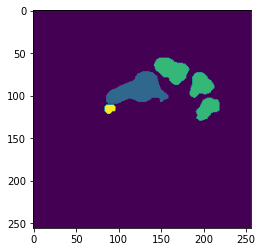

In [17]:
plt.imshow(img)

<AxesSubplot:>

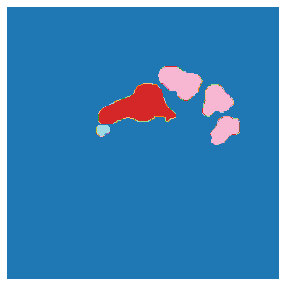

In [23]:
msk = PILMask.create(sub_train_df.iloc[0, -1])
msk.show(figsize=(5,5), alpha=1)

In [24]:
import shutil
os.mkdir("training_images/")
for i,j in zip(sub_train_df["f_path"].values, sub_train_df.index):
    #print (i)
    dest = 'C:\\machine_learning\\kaggle\\uw-madison-gi-tract-image-segmentation\\training_images\\' + i.split("\\")[-1]
    shutil.copy(i, dest)
    sub_train_df.loc[j, "final_path"] = dest

In [25]:
str(Path(sub_train_df.loc[0, "final_path"]))

'C:\\machine_learning\\kaggle\\uw-madison-gi-tract-image-segmentation\\training_images\\slice_0069_266_266_1.50_1.50.png'

In [26]:
os.mkdir("validation_images/")
for i,j in zip(sub_val_df["f_path"].values, sub_val_df.index):
    #print (i)
    dest = 'C:\\machine_learning\\kaggle\\uw-madison-gi-tract-image-segmentation\\validation_images\\' + i.split("\\")[-1]
    shutil.copy(i, dest)
    sub_val_df.loc[j, "final_path"] = dest

In [27]:
final_df = pd.concat([sub_train_df, sub_val_df])

In [28]:
get_msk = lambda o : list(final_df[final_df["final_path"] == str(o)][f"{STYLE}_mask_path"])[0]

In [29]:
str(Path(sub_train_df.loc[0, "final_path"]))

'C:\\machine_learning\\kaggle\\uw-madison-gi-tract-image-segmentation\\training_images\\slice_0069_266_266_1.50_1.50.png'

In [30]:
get_msk(Path(sub_val_df.loc[0, "final_path"]))

'C:\\machine_learning\\kaggle\\uw-madison-gi-tract-image-segmentation\\npy_files_multiclass\\case142_day0_slice_0097_mask.png'

In [31]:
sub_train_df["is_valid"] = False
sub_val_df["is_valid"] = True

final_df = pd.concat([sub_train_df, sub_val_df])

In [32]:
final_df["is_valid"].value_counts()

False    14512
True      2078
Name: is_valid, dtype: int64

In [33]:
dblock = DataBlock(blocks = (ImageBlock, MaskBlock(["Backgroud", "stomach", "large_bowel", "small_bowel"])),
                   get_x = ColReader(-2,),
                   get_y = ColReader(-3),
                   splitter = ColSplitter(),
                   item_tfms = Resize(128, ResizeMethod.Squish),
                   batch_tfms = [Normalize.from_stats(*imagenet_stats)])

In [34]:
dls = dblock.dataloaders(final_df,bs = 20)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\user\miniconda3\envs\fastai\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


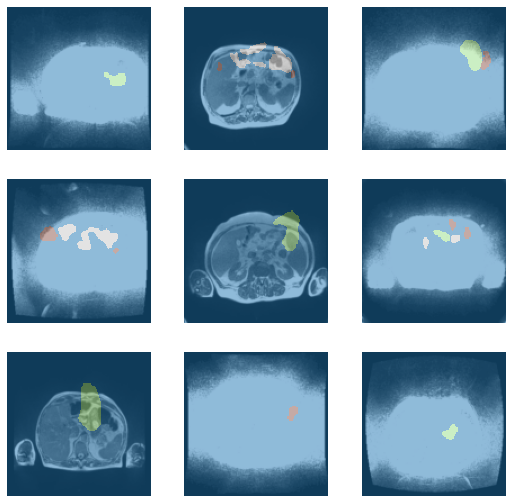

In [35]:
dls.show_batch()

In [36]:
codes = ["Background", "stomach", "large_bowel", "small_bowel"]
#dls.vocab = codes
name2id = {v:k for k,v in enumerate(codes)}
name2id

{'Background': 0, 'stomach': 1, 'large_bowel': 2, 'small_bowel': 3}

In [37]:
learn = unet_learner(dls, resnet34, metrics = DiceMulti, loss_func = DiceLoss())

SuggestedLRs(valley=0.0014454397605732083)

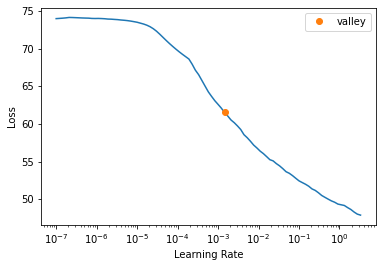

In [38]:
learn.lr_find()

In [39]:
learn.summary()

C:\Users\user\miniconda3\envs\fastai\lib\site-packages\fastai\metrics.py:366: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


DynamicUnet (Input shape: 20 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     20 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     20 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

In [40]:
max_lr = 5e-3
lrs = [max_lr/100, max_lr/10, max_lr]
learn.fit_flat_cos(10, slice(max_lr))

epoch,train_loss,valid_loss,dice_multi,time
0,40.884628,40.971066,0.243978,02:18
1,41.475254,40.971066,0.243978,02:20
2,42.067760,40.971066,0.243978,02:19
3,41.222927,40.971066,0.243978,02:20


KeyboardInterrupt: 

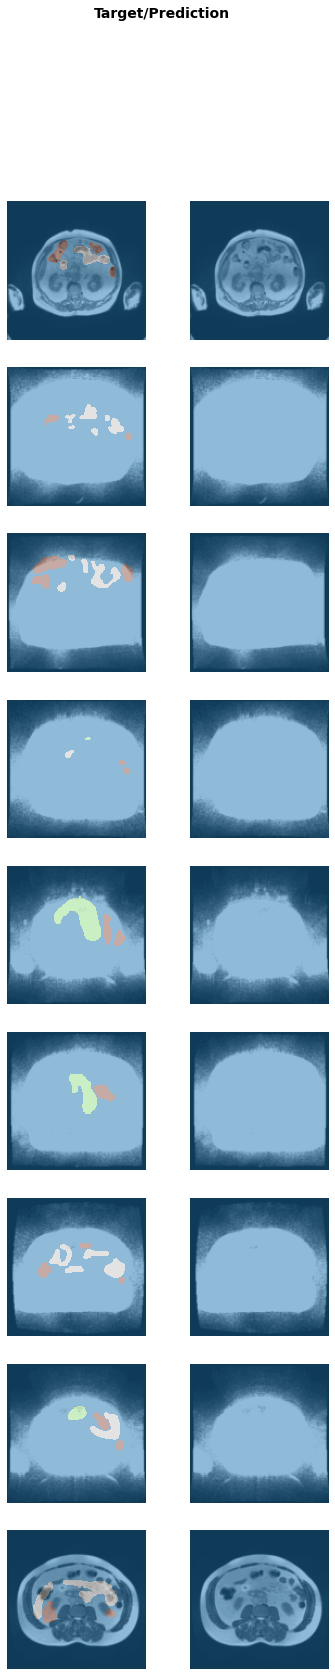

In [41]:
learn.show_results()

In [42]:
x,y = dls.one_batch()

In [43]:
x.shape, y.shape

(torch.Size([20, 3, 128, 128]), torch.Size([20, 128, 128]))

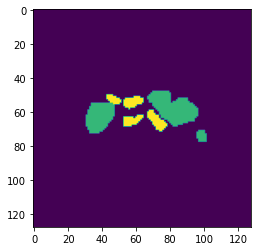

In [44]:
plt.imshow(y[1].cpu().detach().numpy())

In [45]:
set(y[1].cpu().detach().numpy().flat)

{0, 2, 3}